Plot of accuracy (learning curve without testing set)

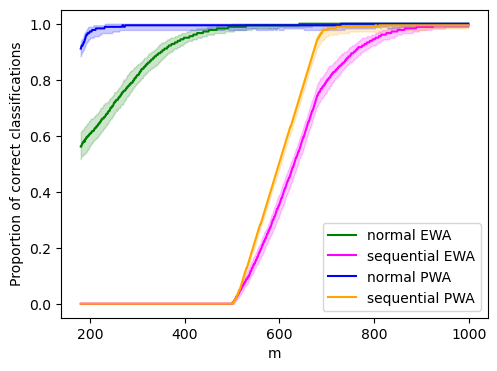

In [1]:
from hansolo2 import *

M=1000
Nb=100
paq=180
level=0.1

#expert = "EWA"
#learning = "sequential"
order = "epoch"

plt.figure(figsize=(5.5,4))

legend=['normal EWA', 'sequential EWA', 'normal PWA', 'sequential PWA']
color=['green','magenta','blue','orange']


answers=np.zeros((4,Nb,M))
expert = "EWA"
answers[0,:,:] = np.load(f'/Users/sophiejaffard/Desktop/saves2/{expert}_{order}_normal.npy')
answers[1,:,:] = np.load(f'/Users/sophiejaffard/Desktop/saves2/{expert}_{order}_sequential.npy')
expert = "PWA"
answers[2,:,:] = np.load(f'/Users/sophiejaffard/Desktop/saves2/{expert}_{order}_normal.npy')
answers[3,:,:] = np.load(f'/Users/sophiejaffard/Desktop/saves2/{expert}_{order}_sequential.npy')


for i in range(4):
    Y=np.zeros((Nb,M-paq)) # percentage of correct guesses for a bloc of paq objects
    for nb in range(Nb):
        for m in range(M-paq):
            Y[nb,m]=np.sum(answers[i,nb,m:m+paq])/paq
    Y_med=np.zeros(M-paq)
    Y_90=np.zeros(M-paq)
    Y_10=np.zeros(M-paq)
    Y_max=np.zeros(M-paq)

    for m in range(M-paq):
        X=Y[:,m]
        X=np.sort(X)
        Y_med[m]=X[int(Nb/2)]
        Y_90[m]=X[int(Nb*(1-level))]
        Y_10[m]=X[int(Nb*level)]
        Y_max[m]=X[Nb-1]
   # if Y_10[m] > Y_med[m]:
        #print(m)

    X2=np.arange(M-paq)+paq
    plt.plot(X2,Y_med, label=legend[i], color=color[i])
    plt.fill_between(X2, Y_10, Y_90, color=color[i], alpha=.2)

#plt.yticks([0.6,0.8,1])
#plt.xticks([500,1500,2500])
plt.ylabel('Proportion of correct classifications')
plt.xlabel('m')

plt.legend()
#plt.savefig('curves.pdf')
plt.show()